<a href="https://colab.research.google.com/github/athabrani/DeepLearning/blob/main/05_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [3]:
def plot_predictions(clf, X, y):
    x0s = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100)
    x1s = np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

#Linear SVM Classification

In [44]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 2).astype(np.float64) # Iris-Virginica if True, else False

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_1d = y.ravel()

In [10]:
lin_svm_clf = SVC(kernel="linear", C=1, random_state=42)
lin_svm_clf.fit(X_scaled, y)

SVC(C=1, kernel='linear', random_state=42)

In [11]:
print("Decision function on a sample: ", lin_svm_clf.decision_function([[5.5, 1.7]])) # Example prediction
print("Prediction on a sample: ", lin_svm_clf.predict([[5.5, 1.7]]))

Decision function on a sample:  [12.81705639]
Prediction on a sample:  [1.]


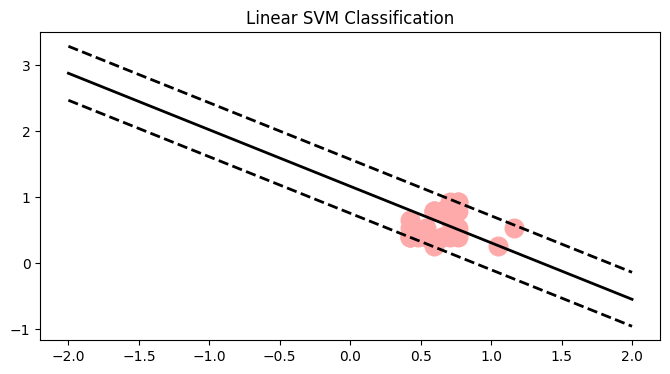

In [12]:
plt.figure(figsize=(8, 4))
plot_svc_decision_boundary(lin_svm_clf, -2, 2)
plt.title("Linear SVM Classification")
plt.show()

#Nonlinear SVM Classification

In [14]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

##Polynomial Features with Linear SVM

In [15]:

print("2.1. Polynomial Features with Linear SVM")
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
]) #
polynomial_svm_clf.fit(X, y)

2.1. Polynomial Features with Linear SVM


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

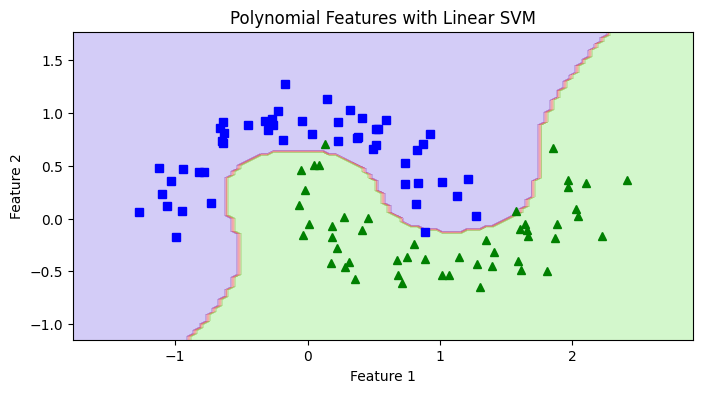

In [16]:
plt.figure(figsize=(8, 4))
plot_predictions(polynomial_svm_clf, X, y)
plt.title("Polynomial Features with Linear SVM")
plt.show()

## SVM Classifier with Polynomial Kernel

In [17]:
poly_kernel_svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=42) #
poly_kernel_svm_clf.fit(X, y) #

SVC(C=5, coef0=1, kernel='poly', random_state=42)

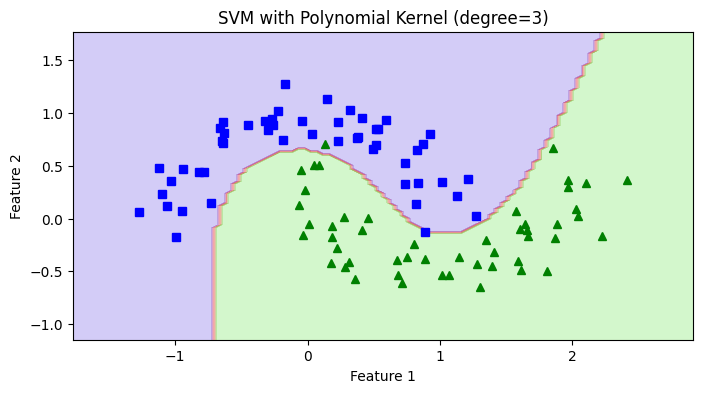

In [18]:
plt.figure(figsize=(8, 4)) #
plot_predictions(poly_kernel_svm_clf, X, y) #
plt.title("SVM with Polynomial Kernel (degree=3)") #
plt.show() #

###Comparing different degree

In [19]:
poly_kernel_svm_clf_high_degree = SVC(kernel="poly", degree=10, coef0=100, C=5, random_state=42) #
poly_kernel_svm_clf_high_degree.fit(X, y)

SVC(C=5, coef0=100, degree=10, kernel='poly', random_state=42)

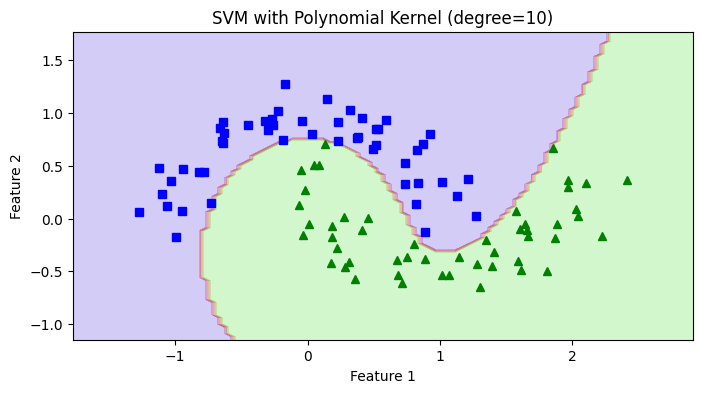

In [20]:
plt.figure(figsize=(8, 4))
plot_predictions(poly_kernel_svm_clf_high_degree, X, y)
plt.title("SVM with Polynomial Kernel (degree=10)")
plt.show()

##SVM Classifier with Gaussian RBF Kernel

In [21]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001, random_state=42))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5, random_state=42))])

###Comparing gamma values

In [22]:
high_gamma_low_c_rbf_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001, random_state=42))
])
high_gamma_low_c_rbf_svm.fit(X, y)

low_gamma_high_c_rbf_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000, random_state=42))
])
low_gamma_high_c_rbf_svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.1, random_state=42))])

Text(0.5, 1.0, 'gamma=5, C=0.001 (Underfitting)')

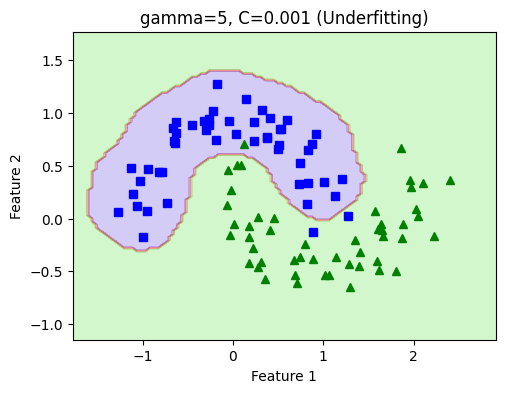

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_predictions(high_gamma_low_c_rbf_svm, X, y)
plt.title(f"gamma=5, C=0.001 (Underfitting)")

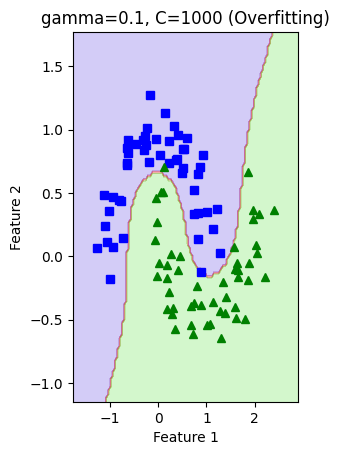

In [24]:
plt.subplot(122)
plot_predictions(low_gamma_high_c_rbf_svm, X, y)
plt.title(f"gamma=0.1, C=1000 (Overfitting)")
plt.show()

#SVM Regression

In [36]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [37]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear", C=1.5)
svm_reg.fit(X, y.ravel())
print("SVR Prediction: ", svm_reg.predict([[1.5]]))

SVR Prediction:  [8.39963638]


#Under the Hood (Hinge Loss)

In [47]:
sgd_clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_scaled, y_1d)
print("SGDClassifier (Linear SVM) Prediction: ", sgd_clf.predict([[5.5, 1.7]]))

SGDClassifier (Linear SVM) Prediction:  [1.]
